In [19]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

In [20]:
# Importing data
df = pd.read_csv('data/train.csv')

In [21]:
df.head(10)

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Male,23.170309,1.707557,75.306702,yes,2.303367,1.277636,Sometimes,no,3.042774,Sometimes,yes,no,0.944982,0.366126,Public_Transportation,Body Level 3
1,Female,39.965474,1.739293,80.914382,yes,2.416044,1.352649,Sometimes,no,3.196043,Sometimes,no,no,0.148628,1.082660,Automobile,Body Level 3
2,Female,19.000000,1.650000,56.000000,yes,3.000000,3.000000,Frequently,yes,3.000000,Frequently,yes,yes,1.000000,2.000000,Public_Transportation,Body Level 2
3,Female,18.297229,1.637396,70.000000,yes,2.000000,2.326165,no,no,1.999014,Sometimes,yes,no,0.007050,0.000000,Public_Transportation,Body Level 3
4,Male,18.701766,1.704908,81.384224,yes,2.650629,1.708083,Sometimes,no,1.000000,Sometimes,yes,no,1.876051,0.938791,Public_Transportation,Body Level 3
5,Male,30.200946,1.755926,112.289883,yes,2.317734,2.152736,no,no,3.000000,Sometimes,yes,no,0.000000,1.108145,Automobile,Body Level 4
6,Female,34.369686,1.652202,77.133220,yes,2.595128,1.642251,no,no,1.619796,Sometimes,yes,no,0.662831,0.999268,Automobile,Body Level 3
7,Male,36.673882,1.792100,101.285765,yes,2.222282,2.791604,Sometimes,no,1.578751,Sometimes,yes,no,2.352091,0.317846,Automobile,Body Level 4
8,Female,41.743333,1.678610,79.849252,yes,2.733129,1.302594,no,no,3.000000,Sometimes,yes,no,0.000000,1.103349,Automobile,Body Level 3
9,Female,18.024744,1.617192,83.121811,yes,2.976509,1.022705,no,no,3.000000,Sometimes,yes,no,1.025690,0.313016,Public_Transportation,Body Level 4


In [22]:
# Check for null values and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1033 non-null   object 
 1   Age                 1033 non-null   float64
 2   Height              1033 non-null   float64
 3   Weight              1033 non-null   float64
 4   H_Cal_Consump       1033 non-null   object 
 5   Veg_Consump         1033 non-null   float64
 6   Water_Consump       1033 non-null   float64
 7   Alcohol_Consump     1033 non-null   object 
 8   Smoking             1033 non-null   object 
 9   Meal_Count          1033 non-null   float64
 10  Food_Between_Meals  1033 non-null   object 
 11  Fam_Hist            1033 non-null   object 
 12  H_Cal_Burn          1033 non-null   object 
 13  Phys_Act            1033 non-null   float64
 14  Time_E_Dev          1033 non-null   float64
 15  Transport           1033 non-null   object 
 16  Body_L

In [23]:
# Get a summary of numerical features.
df.describe()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,24.273712,1.702666,86.305256,2.428403,2.000652,2.680538,1.031515,0.649803
std,6.376439,0.093934,26.239851,0.543237,0.616888,0.798427,0.836129,0.601642
min,15.000000,1.456346,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.816228,1.630000,65.000000,2.000000,1.543021,2.658478,0.184917,0.000000
50%,22.720449,1.701650,83.000000,2.449267,2.000000,3.000000,1.000000,0.616045
75%,26.000000,1.772045,106.421042,3.000000,2.462916,3.000000,1.683497,1.000000
max,55.246250,1.980000,173.000000,3.000000,3.000000,4.000000,3.000000,2.000000


In [24]:
# Last but not least, use a baseline. In this case, we used ZeroR.
blc = df['Body_Level'].value_counts()
blc = dict(blc)
max_label = None
max_value = 0
for key in blc.keys():
    if max_label is None:
        max_label = key
        max_value = blc[key]
        continue
    if blc[key] > max_value:
        max_label = key
        max_value = blc[key]
y_true = list(df['Body_Level'])
y_pred = [max_label] * len(df.index)

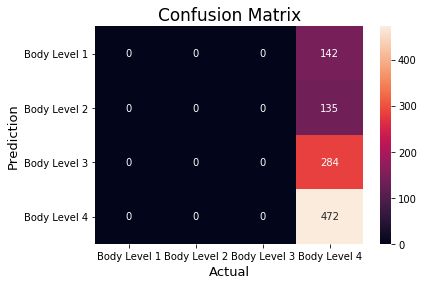

In [25]:
# Compute the confusion matrix.
cm = confusion_matrix(y_true,y_pred)
# Plot the confusion matrix.
labels = list(set(y_true))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [26]:
# Finding the accuracy.
accuracy = accuracy_score(y_true,y_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(y_true,y_pred)
print("Precision :", precision)
print("Recall    :", recall)
print("F1-score  :", F1_score)
print("Support  :", support)

Accuracy   : 0.4569215876089061
Precision : [0.         0.         0.         0.45692159]
Recall    : [0. 0. 0. 1.]
F1-score  : [0.         0.         0.         0.62724252]
Support  : [142 135 284 472]


d:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
df_val = pd.read_csv('data/val.csv')
y_true = list(df_val['Body_Level'])
y_pred = [max_label] * len(df_val.index)

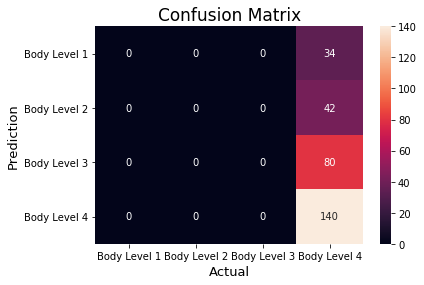

In [28]:
# Compute the confusion matrix.
cm = confusion_matrix(y_true,y_pred)
# Plot the confusion matrix.
labels = list(set(y_true))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [29]:
# Finding the accuracy.
accuracy = accuracy_score(y_true,y_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(y_true,y_pred)
print("Precision :", precision)
print("Recall    :", recall)
print("F1-score  :", F1_score)
print("Support  :", support)

Accuracy   : 0.47297297297297297
Precision : [0.         0.         0.         0.47297297]
Recall    : [0. 0. 0. 1.]
F1-score  : [0.         0.         0.         0.64220183]
Support  : [ 34  42  80 140]
